<a href="https://colab.research.google.com/github/eovallemagallanes/pattern-recognition/blob/main/Mahalanobis_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mahalanobis distance**



In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
def mahalanobis(x_0=None, X=None, cov=None):
    x_mu = x_0 - np.mean(X)
    if not cov:
        cov = np.cov(X.T)
    inv_cov = np.linalg.inv(cov)
    mahal = x_mu @ inv_cov @ x_mu.T

    return mahal

Test point:  [[ 8.79476988 -8.5895115 ]]
Distances:  [[[143.90953752 115.45551868]]]
Predicted Class:  1


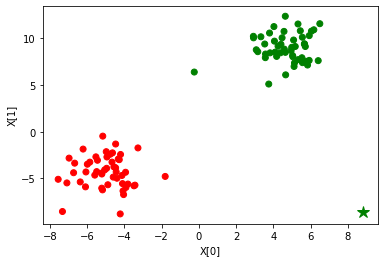

In [9]:
# gen data
X, y = make_blobs(n_samples = 100, 
                  centers = 2,
                  n_features = 2,
                  cluster_std= 1.5)


# split by class
X0 = X[np.where(y==0)]
X1 = X[np.where(y==1)]

# gen test data
x_0 = np.random.uniform(-10,10,(1,2))
print('Test point: ', x_0)

# get mahalanobis distance
m_dist = np.array([mahalanobis(x_0, X0), mahalanobis(x_0, X1)])

# get class (min distance)
print('Distances: ', m_dist.T)
y_pred = np.argmin(m_dist)
print('Predicted Class: ', y_pred)


# plot
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[y])
plt.plot(x_0[0, 0], x_0[0, 1], '*', color=rgb[y_pred], markersize=12)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.show()